# 01 Structure Explorer

展示结构的几何拓扑信息，包括节点、单元、约束等。

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from utils.data_loader import load_structure_config
from utils.visualizer import plot_structure_topology
from utils.config import STRUCTURE_PATH

## 加载结构配置

In [2]:
# 加载结构配置文件
structure = load_structure_config(STRUCTURE_PATH)

# 显示基本信息
print("=" * 50)
print("结构基本信息")
print("=" * 50)
print(f"描述: {structure['metadata']['description']}")
print(f"节点数: {structure['metadata']['num_nodes']}")
print(f"单元数: {structure['metadata']['num_elements']}")
print(f"自由度: {structure['metadata']['num_dofs']}")
print(f"每节点自由度: {structure['metadata']['dofs_per_node']}")

结构基本信息
描述: 3-Triangle Truss Bridge Structure
节点数: 7
单元数: 11
自由度: 14
每节点自由度: 2


## 节点信息

In [3]:
# 显示节点信息
print("\n节点坐标:")
print("-" * 30)
for node in structure['nodes']:
    print(f"Node {node['id']}: ({node['coords'][0]:.2f}, {node['coords'][1]:.2f})")


节点坐标:
------------------------------
Node 0: (0.00, 0.00)
Node 1: (1.00, 1.50)
Node 2: (2.00, 0.00)
Node 3: (3.00, 1.50)
Node 4: (4.00, 0.00)
Node 5: (5.00, 1.50)
Node 6: (6.00, 0.00)


## 单元信息

In [4]:
# 显示单元信息
print("\n单元连接:")
print("-" * 30)
for elem in structure['elements']:
    print(f"Element {elem['id']}: Nodes {elem['nodes']} | Material: {elem['material']} | A: {elem['A']}")


单元连接:
------------------------------
Element 0: Nodes [0, 2] | Material: steel | A: 0.005
Element 1: Nodes [2, 4] | Material: steel | A: 0.005
Element 2: Nodes [4, 6] | Material: steel | A: 0.005
Element 3: Nodes [1, 3] | Material: steel | A: 0.005
Element 4: Nodes [3, 5] | Material: steel | A: 0.005
Element 5: Nodes [0, 1] | Material: steel | A: 0.005
Element 6: Nodes [1, 2] | Material: steel | A: 0.005
Element 7: Nodes [2, 3] | Material: steel | A: 0.005
Element 8: Nodes [3, 4] | Material: steel | A: 0.005
Element 9: Nodes [4, 5] | Material: steel | A: 0.005
Element 10: Nodes [5, 6] | Material: steel | A: 0.005


## 材料属性

In [5]:
# 显示材料属性
print("\n材料属性:")
print("-" * 50)
for mat in structure['materials']:
    print(f"材料名称: {mat['name']}")
    print(f"  弹性模量 E = {mat['E']:.2e} Pa")
    print(f"  密度 ρ = {mat['rho']:.2f} kg/m³")
    print(f"  泊松比 ν = {mat['nu']:.2f}")



材料属性:
--------------------------------------------------
材料名称: steel
  弹性模量 E = 2.00e+11 Pa
  密度 ρ = 7850.00 kg/m³
  泊松比 ν = 0.30


## 边界条件

In [6]:
# 显示边界条件
print("\n边界条件:")
print("-" * 30)
for bc in structure['boundary']:
    print(f"Node {bc['node_id']}: {bc['constraints']}")


边界条件:
------------------------------
Node 0: ['ux', 'uy']
Node 6: ['uy']


## 绘制结构拓扑图

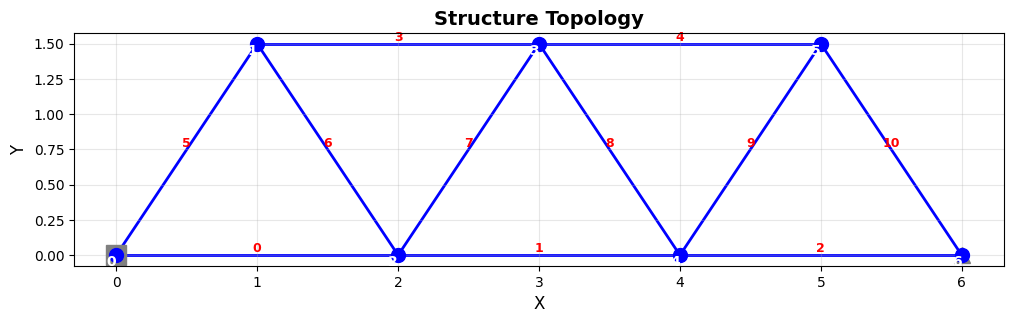

In [7]:
# 提取节点和单元数据用于可视化
nodes = {n['id']: n for n in structure['nodes']}
elements = {e['id']: e for e in structure['elements']}

# 绘制拓扑图
plot_structure_topology(
    nodes, 
    elements, 
    constraints=structure['boundary'],
    show_node_ids=True,
    show_elem_ids=True,
    show_constraints=True
)